In [1]:
from math import sin, cos, pi     #数学関数・定数のインポート
import numpy as np                #数値計算機能のインポート 別名np
import matplotlib.pyplot as plt   #グラフ描画機能のインポート 別名plt
from ipywidgets import interact   #対話的処理機能のインポート

# アフィン変換

### 回転行列(2次元)を作る関数

In [2]:
def R_2d(angle):

  R = np.array([
    [ cos(angle), -sin(angle) ],              
    [ sin(angle),  cos(angle) ],              
  ])

  return R

### アフィン変換する関数

In [3]:
def affine_trans(x0, angle, r):

  R = R_2d(angle)
  x = np.dot(R, x0) + r #行列Rとベクトルx0の積＋ベクトルr

  return x

In [4]:
affine_trans([1,0], pi/2, [1,0]) #お試し

array([1., 1.])

## 三角形のアフィン変換

### 三角形のデータ（初期状態）

In [5]:
points0 = np.array([
  [2, -4,  2,  2],  #x座標　×4点
  [2, -1, -1,  2]   #y座標　×4点                
])

### 三角形を描く関数

In [6]:
def plot_points( points ):

  plt.plot( points[0,:], points[1,:] )
  plt.xlabel('x')
  plt.ylabel('y')

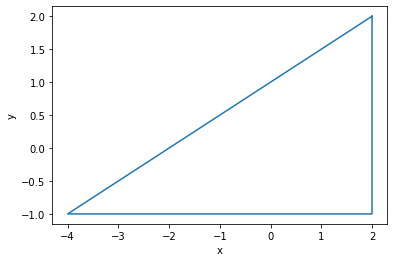

In [7]:
plot_points( points0 ) #初期状態をプロット

### 三角形をアフィン変換する関数

In [8]:
def affine_points( points, angle, r ):

  pointsT = points.T  #プログラムの都合上，転地

  newpoints = []  #空のリスト
  for point in pointsT:
    newpoint = affine_trans(point, angle, r)
    newpoints.append(newpoint)

  return np.array(newpoints).T

90度回してみる

[[-2.  1.  1. -2.]
 [ 2. -4.  2.  2.]]


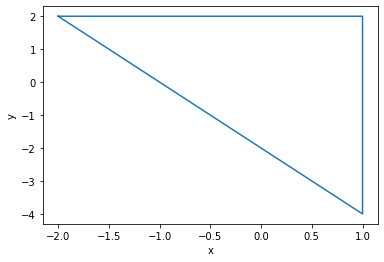

In [9]:
newpoints = affine_points( points0, pi/2, [0,0] ) #回転角π/2, 平行移動(rx=0,ry=0)
print(newpoints)
plot_points(newpoints)

## 手動操作

In [10]:
Nr = 50   #変位ベクトルの刻み数
dr = 0.2  #変位ベクトルの刻み幅
Na = 50   #角度の刻み数
da = pi / Na   #角度の刻み幅


@interact(
    rx=(-10, 10, 1), 
    ry=(-10, 10, 1),
    angle=(-pi, pi, pi/20)
)
def f(rx, ry, angle):

    print('r = (%f, %f), angle=%f'%(rx,ry,angle))

    newpoints = affine_points( points0, angle, [rx, ry] )

    fig = plt.figure(figsize=(5,5))   #正方形の用紙
    ax = plt.axes()                   #用紙上にグラフ用紙を作る
    ax.set_xlim([-10,10])             #x軸の範囲
    ax.set_ylim([-10,10])             #y軸の範囲
    ax.set_xlabel('x')                #x軸のラベル
    ax.set_ylabel('y')                #y軸のラベル
    ax.grid()

    ax.plot( newpoints[0,:], newpoints[1,:] )

interactive(children=(IntSlider(value=0, description='rx', max=10, min=-10), IntSlider(value=0, description='r…